Goal is to produce maps that can be printed off to play with projections

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

In [2]:
central_equator = [0, 0]
nyc = [-74, 41]

gc = sgeom.LineString([central_equator, nyc])

def decorate(ax):
    ax.gridlines()
    ax.coastlines()
    ax.tissot(alpha=0.35, rad_km=800, facecolor='orange')
    
    ax.add_geometries(
        [gc], ccrs.Geodetic(),
        edgecolor='red', facecolor='none',
        linewidth=2)

/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x115b517d8> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x115b51780> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


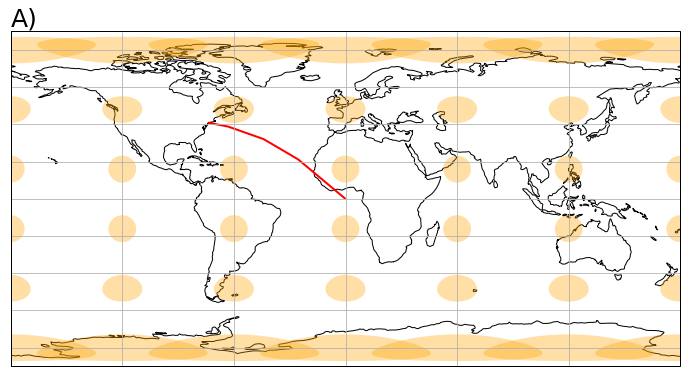

In [3]:
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('A)', loc='left', fontsize=25)
decorate(ax)

In [4]:
class AlbersEqualArea(ccrs.AlbersEqualArea):
    @property
    def threshold(self):
        return super().threshold / 10.
    
class LambertConformal(ccrs.LambertConformal):
    @property
    def threshold(self):
        return super().threshold / 10.

class PlateCarree(ccrs.PlateCarree):
    @property
    def threshold(self):
        return super().threshold / 10.

class Mercator(ccrs.Mercator):
    @property
    def threshold(self):
        return super().threshold / 10.

In [5]:
projections = [PlateCarree(), Mercator(), LambertConformal(),
               ccrs.Sinusoidal(), ccrs.AzimuthalEquidistant(),
               ccrs.Stereographic(), ccrs.Robinson(), AlbersEqualArea()]

/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x116b46b48> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x116b46c50> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x116b46e60> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic objec

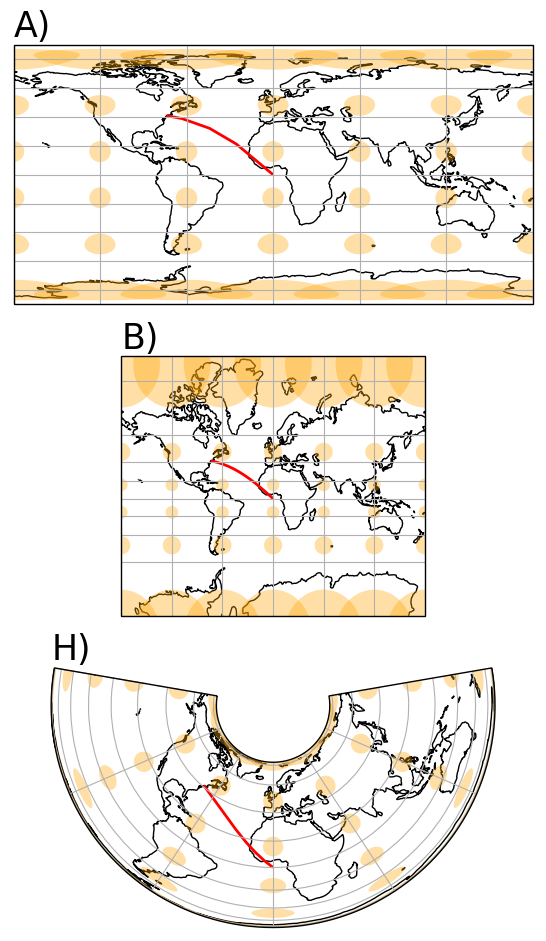

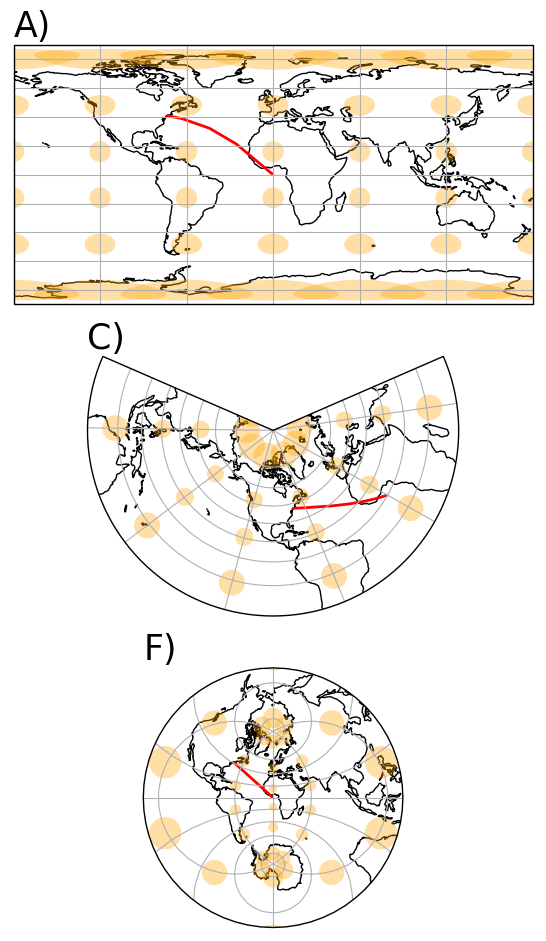

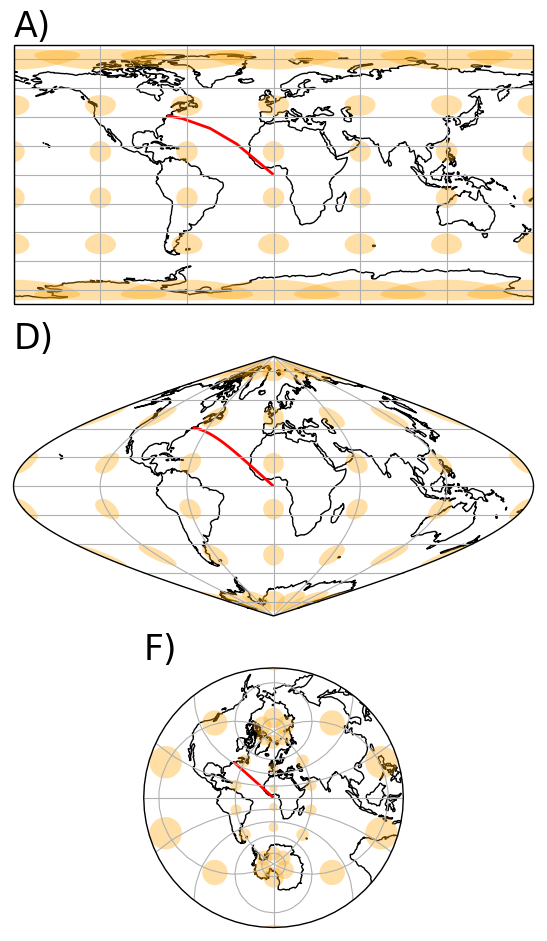

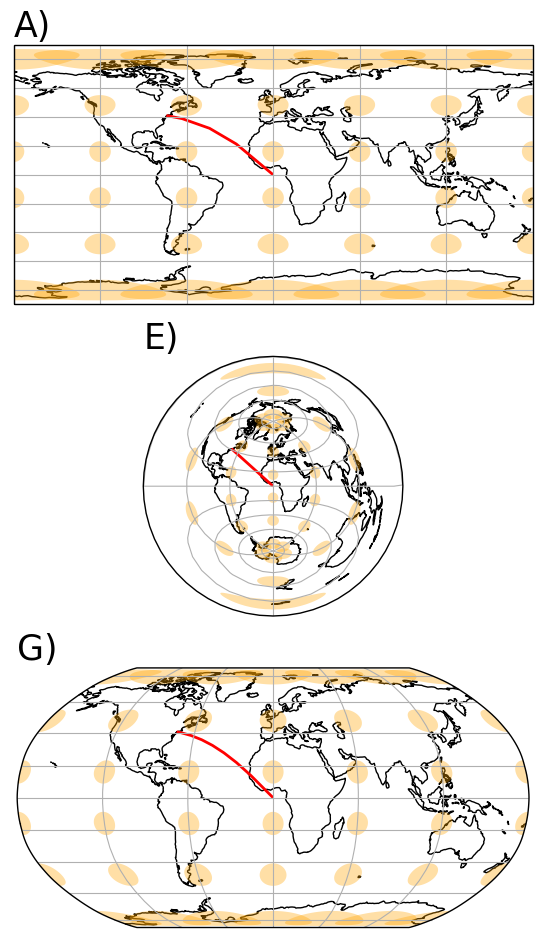

In [7]:
ALPHA = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# On each page, pick out the projections by index.
pages = [[0, 1, 7],
         [0, 2, 5],
         [0, 3, 5],
         [0, 4, 6]]

for i, page in enumerate(pages):
    # Create a figure instance (ie. a new page)
    fig = plt.figure(figsize=(8.27, 11.69), dpi=100)

    page_projections = [(ind, projections[ind]) for ind in page]
    for j, proj_ind in enumerate(page):
        proj = projections[proj_ind]
        ax = fig.add_subplot(
            len(page_projections), 1, j + 1,
            projection=proj)
        decorate(ax)
        ax.set_title(ALPHA[proj_ind] + ')',
                     loc='left', fontsize=25)

    plt.savefig('sheet{}.pdf'.format(i + 1))

/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x109774fc0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x117f1f048> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x117f1f200> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/Users/pelson/miniconda/envs/scipy-cartopy-tutorial/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic objec

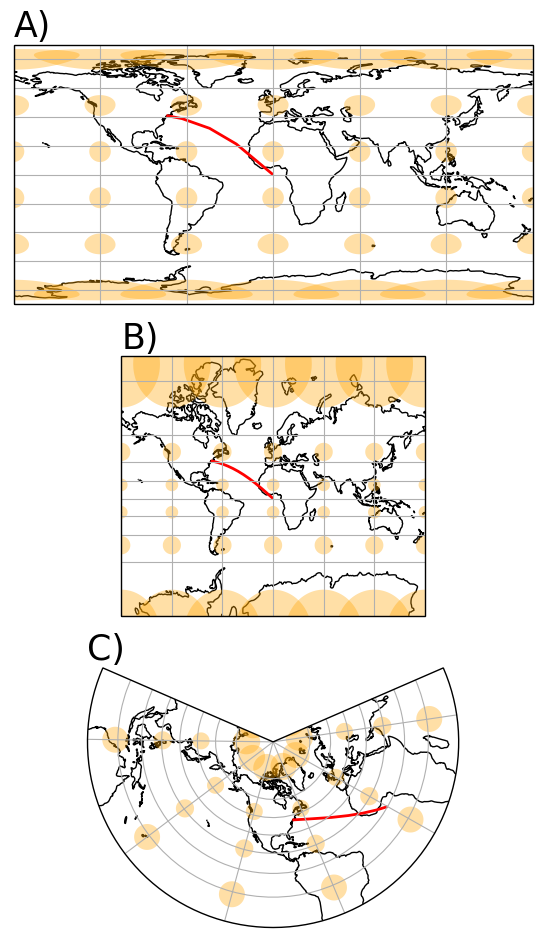

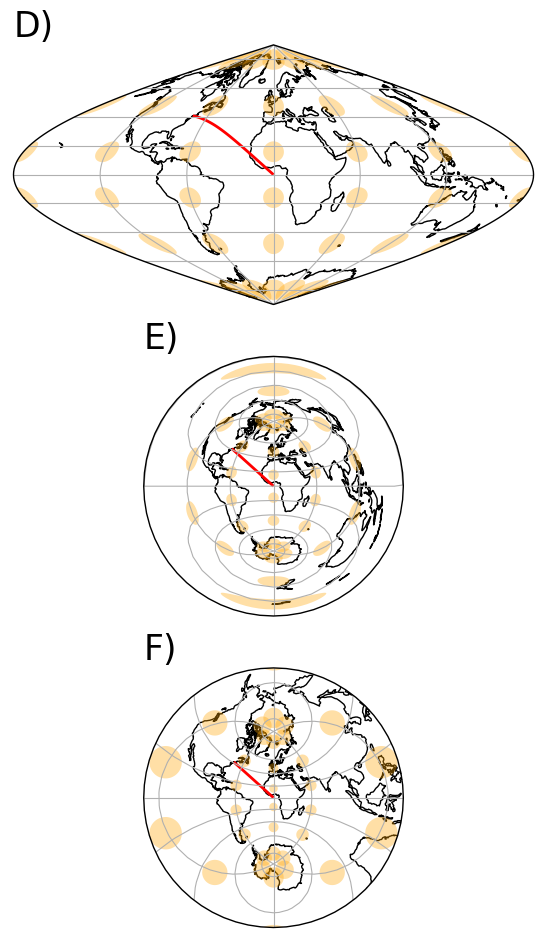

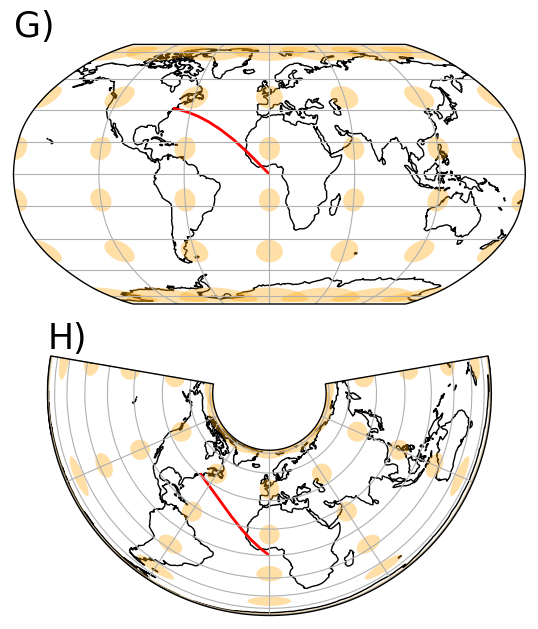

In [8]:
from matplotlib.backends.backend_pdf import PdfPages
 

pdf_pages = PdfPages('projections.pdf')

proj_per_page = 3
n_pages = (len(projections) + proj_per_page - 1) // proj_per_page

ALPHA = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

for i in range(n_pages):
    # Create a figure instance (ie. a new page)
    fig = plt.figure(figsize=(8.27, 11.69), dpi=100)

    page_projections = projections[proj_per_page*i:(proj_per_page*i + proj_per_page)]
    for j, proj in enumerate(page_projections):
        ax = fig.add_subplot(proj_per_page, 1, j + 1, projection=proj)
        decorate(ax)
        ax.set_title(ALPHA[i * proj_per_page + j] + ')', loc='left', fontsize=25)

    pdf_pages.savefig(fig)

pdf_pages.close()

Combine this with PDF content from https://docs.google.com/document/d/1t2YntZiqBV45DmhATHvdiyrevnBwvHlcYqWF0Stei0w/edit?usp=sharing.

In [9]:
!gs -q -sPAPERSIZE=letter -dNOPAUSE -dBATCH -sDEVICE=pdfwrite \
    -sOutputFile=handouts.pdf \
    glossary.pdf sheet1.pdf \
    glossary.pdf sheet2.pdf \
    glossary.pdf sheet3.pdf \
    glossary.pdf sheet4.pdf
    
!gs -q -sPAPERSIZE=letter -dNOPAUSE -dBATCH -sDEVICE=pdfwrite \
    -sOutputFile=all.pdf \
    glossary.pdf projections.pdf